In [1]:
# Data is Non Linear Seperable - Apply PCA

In [2]:
# Kernel PCA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


In [7]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Predict the test_set results
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
# Evaluate the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_results = confusion_matrix(y_test,y_predict)

In [10]:
cm_results

array([[64,  4],
       [ 6, 26]], dtype=int64)

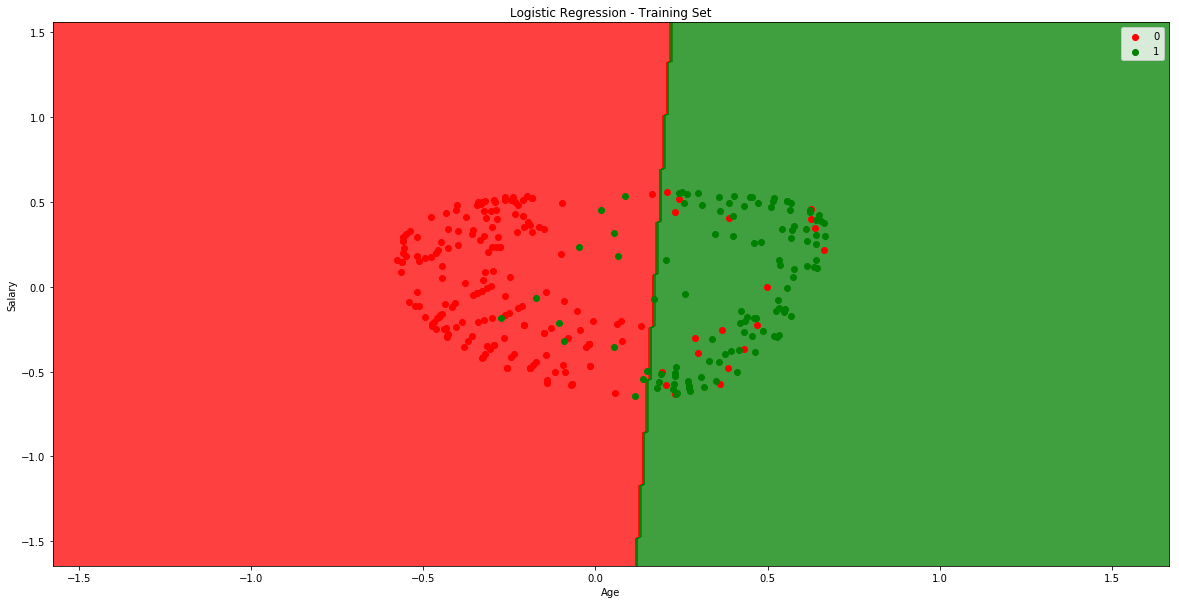

In [11]:
# Visualize the Testing dataset Result
# Import the Color Map class
from matplotlib.colors import ListedColormap

# Training Dataset
X_set,y_set = X_train, y_train

# set the plot figsize
plt.figure(figsize=(20,10))


# Prepare the grid by collect the pixel points and put it in the frame
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Contour function will create a linear line between red and green
# Use predict function to predict the 0 or 1.If predict as 0 it will colorised as red or else it will green
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))

# Create a limit of estimate salary
plt.ylim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Create a scatter plot
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j, 0] , X_set[y_set ==j, 1], c = ListedColormap(('red','green'))(i), label = j)
    
plt.title("Logistic Regression - Training Set")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()


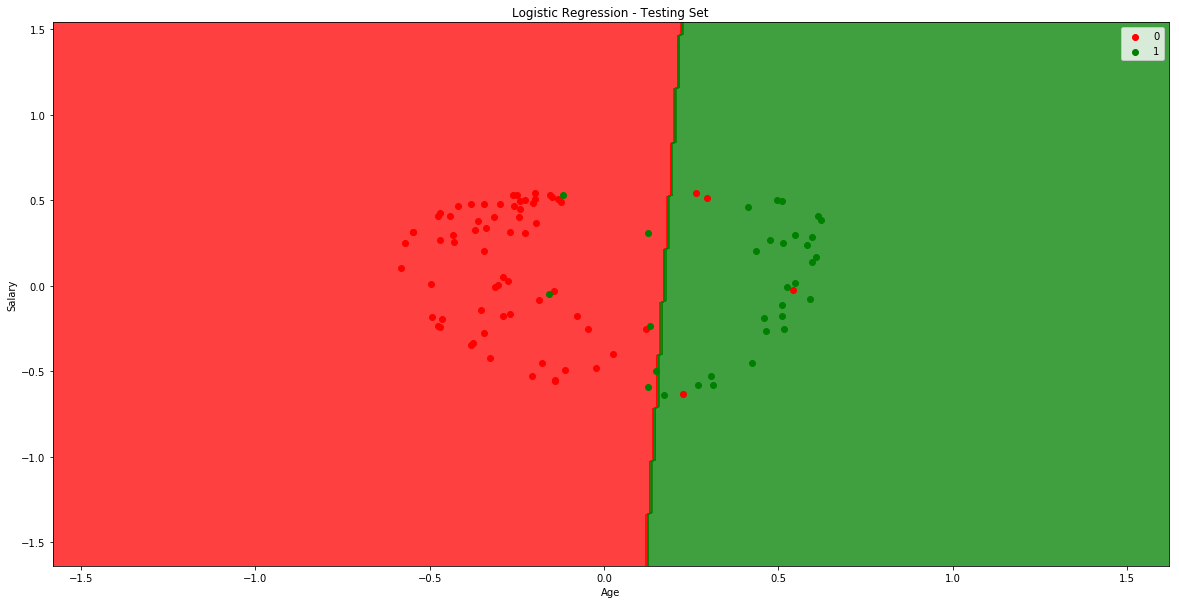

In [12]:
# Visualize the Testing dataset Result
# Import the Color Map class
from matplotlib.colors import ListedColormap

# Training Dataset
X_set,y_set = X_test, y_test

# set the plot figsize
plt.figure(figsize=(20,10))


# Prepare the grid by collect the pixel points and put it in the frame
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


# Contour function will create a linear line between red and green
# Use predict function to predict the 0 or 1.If predict as 0 it will colorised as red or else it will green
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))

# Create a limit of estimate salary
plt.ylim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Create a scatter plot
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j, 0] , X_set[y_set ==j, 1], c = ListedColormap(('red','green'))(i), label = j)
    
plt.title("Logistic Regression - Testing Set")
plt.xlabel("Age")
plt.xlabel("Estimated Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [13]:
cm_results

array([[64,  4],
       [ 6, 26]], dtype=int64)

In [14]:
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

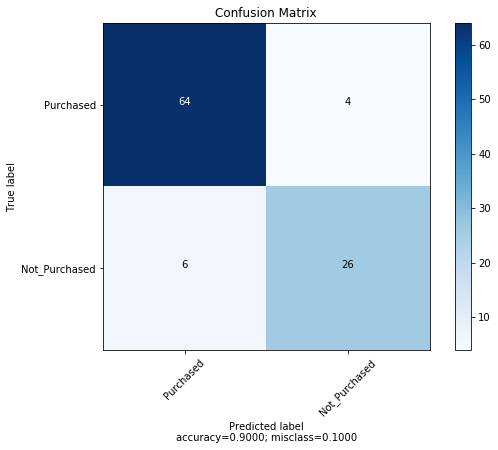

In [15]:
plot_confusion_matrix(cm           = cm_results, 
                      normalize    = False,
                      target_names = ['Purchased', 'Not_Purchased'],
                      title        = "Confusion Matrix")